<a href="https://colab.research.google.com/github/LukasAlves2711/Data-Science-Analysis/blob/main/Project_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size=10>Data Science project applied Alura Bootcamp</font>

<font size=6>Sus Hospital Procedures - Brazil</font>

----



  In this project an analysis of the data regarding the hospital production base will be made.
  Health is considered a priority area by both the government and the population. Therefore, it has a constitutional floor. Article 198, second paragraph, item I of the Constitution determines that 13.2% of the current net revenue of the federal government (a percentage that should reach 15% in 2020) is destined to public health services. According to the newspaper Estado de São Paulo, the 109 billion in 2016 is approximately R $ 6 billion above the minimum determined by the Constitution.
  PEC 55 predicts that health expenditures are expected to grow at least equivalent to inflation. But real growth will depend on cuts in other areas, making investment growth uncertain.
  Within this context, some characteristics, public expenditures, numbers of intentions, among other data from the Unified Health System will be addressed.

----

## <font>Analysis Steps</font>

---


# Sources used
*  Source: DATASUS
*  Link: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def

## <font>Imports</font>
##  <font size=4> Package imports </font>


In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import matplotlib.patches as map

##  <font size=4>Data imports </font>


In [2]:
url = "https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Modulo_1/A191953189_28_143_208.csv"
datas = pd.read_csv(url, 
                 encoding = "ISO-8859-1",
                 skiprows = 3, sep = ";", skipfooter = 12,
                 thousands = ".", decimal = ",", engine = "python")
datas.head()

url_pop='https://raw.githubusercontent.com/didi-a-p/BootcampDataScienceAlura/main/Analisando%20dados%20da%20sa%C3%BAde%20com%20Python%20e%20Pandas/dados/Pop%20-%20BRASIL_E_UFs.csv'
pop = pd.read_csv(url_pop, usecols=[0,2])

## <font>Data cleaning</font>
##  <font size=4>Analysis of experimental data</font>


It is possible to note the amount of data

In [3]:
datas.shape

(27, 161)

Analyzing the shape of the data table, the 27 states and the respective dates were found for a monthly period

In [4]:
datas.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,9.964113e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,4.500485e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1.917248e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.32

The analysis will be done in the months when the following values

In [5]:
datas.mean()

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2020/Dez    5.337776e+07
2021/Jan    5.607375e+07
2021/Fev    5.557823e+07
2021/Mar    6.250230e+07
Total       6.388213e+09
Length: 159, dtype: float64

In order to know the average expenditure of each state per month, a function will be used where the states and their total average will be observed. However, the data is formatted in a hostile manner. To get a better understanding, it will be formatted for something more usual

In [6]:
pd.options.display.float_format='{:.2f}'.format

Now with standardized and visually more understandable data

In [7]:
datas.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Dez     53377763.15
2021/Jan     56073748.02
2021/Fev     55578233.31
2021/Mar     62502301.42
Total      6388213338.48
Length: 159, dtype: float64

A brief analysis in the first month for which the data is complete. To have a visual dimension of which states have the highest hospital expenses

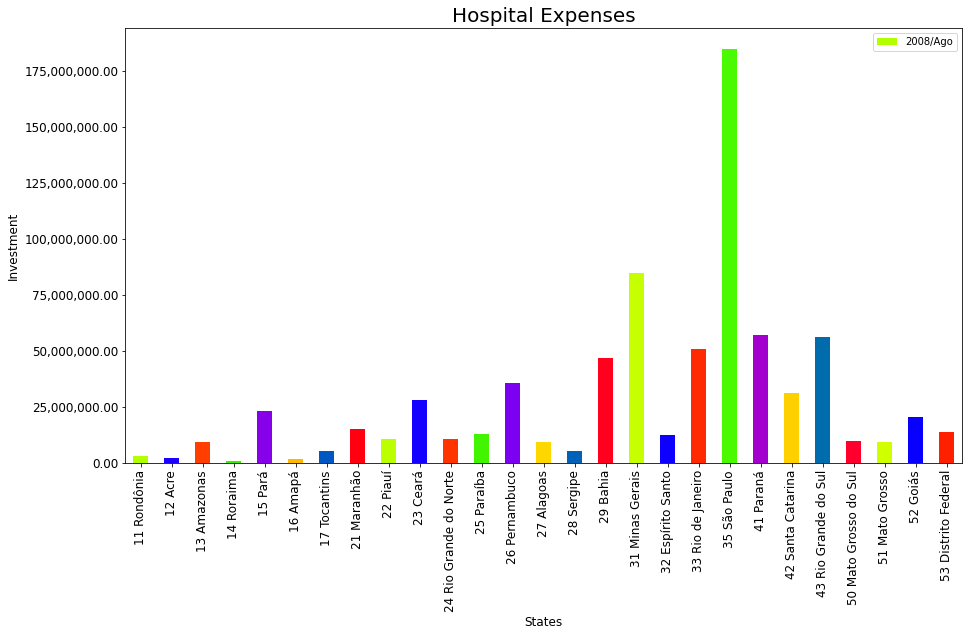

In [8]:
#setconfig
ax = datas.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(15,8), color=sns.color_palette('prism', 27))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# background style
sns.set_style('darkgrid')

# chart settings
plt.title('Hospital Expenses', fontsize=20)
plt.xlabel('States', fontsize=12)
plt.ylabel('Investment', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# exhibition
plt.show()

-------------------

#   Analysis of states with higher expenditures 

To do this analysis it is necessary to select the complete data

In [9]:
columns_datas = datas.mean().index.tolist()
columns_datas.insert(0, 'Unidade da Federação')
columns_datas = datas[columns_datas]
select_datas =  columns_datas.set_index('Unidade da Federação')
select_datas.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,4769347.86,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,2723636.56,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,11061892.22,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,1067658.

Soon after the selection it will be possible to make the necessary manipulation to obtain the necessary data for the analysis of the biggest expenses. Through the sums of investments

In [10]:
select_datas['Total'] = select_datas.sum(axis=1)
select_datas.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,4769347.86,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,1989217501.93
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,2723636.56,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,900097060.94
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,11061892.22,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,3824765237.94
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,1067658

This way they will be selected, to observe the five biggest

In [11]:
highest_values = select_datas.sort_values('Total', ascending=False)
highest_values = highest_values.drop('Total', axis=1)
months_comparison = highest_values.columns[6:]
highest_values = highest_values[months_comparison]
highest_values.head(5)


,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,194398399.48,184854516.35,188636359.55,179706467.00,167990352.53,191857317.83,182797194.35,186855294.82,212777859.48,203186114.01,217040531.70,217195249.91,220761157.51,232536720.14,221987951.33,220117480.90,209094405.40,214565774.66,203116173.19,227248380.06,231543598.66,230188803.42,226021072.14,229662643.34,234530618.12,233453453.42,221127119.42,239790045.49,236929144.68,227533337.27,231062206.94,241947462.16,236443416.78,244464657.96,234179405.30,250900143.56,245433156.23,245477472.67,244204324.99,244074129.17,...,280080500.10,279203782.81,269524844.81,286775733.92,289711791.16,293104281.74,287922148.67,291524922.05,298702204.56,282739086.76,295671659.07,283947815.42,283179040.80,298180056.65,279427204.24,288819396.39,297834670.24,303889049.22,293587709.50,305033842.80,313868712.55,298547868.27,310847061.00,292851698.72,284749770.52,304511719.34,288872273.89,297359679.70,251331659.00,272493373.35,306768344.30,367648996.72,349900969.68,354117254.42,345733068.79,335084865.66,330489045.98,355149525.60,348827130.99,392946147.42
31 Minas Gerais,85360064.11,84722528.10,84601757.95,85559789.46,78329947.11,86917741.55,91374305.25,90153672.61,95290591.54,94091211.77,99076844.10,96189182.42,102754354.58,100080062.68,97956440.66,100726279.56,95354390.87,99017646.65,91519360.96,101602091.09,102020854.18,103346519.08,102489257.42,104427655.72,104334532.58,102057421.34,102296496.62,104624739.27,106029536.34,102848906.27,103097090.32,107148899.31,109395956.79,110963598.17,108798032.84,116882816.72,115819574.80,113941917.09,112266703.41,110320105.12,...,142848565.53,143158486.97,136705143.41,149829968.56,149894503.75,151546897.83,151514201.61,156680218.93,154281495.01,153867888.29,151228318.67,144867656.44,146715346.61,154066649.81,147968852.80,153459790.69,156777495.40,162963014.15,154830086.49,166207471.07,164287071.70,156567882.88,165120780.19,153006371.54,153901643.72,159280453.89,150237121.46,142897333.08,133416702.94,133514800.21,139943759.22,165759955.94,171048093.95,175439696.53,178279152.74,175253226.91,172509435.62,174722161.98,177270694.34,200471045.07
41 Paraná,58094241.83,56982774.90,57549082.26,57121887.41,53117936.61,63910909.46,64523066.04,60783727.39,65633573.31,64759375.78,65902215.41,66280753.00,69158603.32,68256573.41,66394412.26,66395558.19,67070814.17,65492818.75,62237724.45,70702537.78,70374693.61,72058180.69,71935547.82,72371869.39,74708055.69,72785908.90,72851750.47,75595725.52,74366096.98,75110313.47,72128616.95,73759982.82,76599030.33,75660652.68,77258175.98,80842051.59,80617519.85,75549674.67,77593673.00,76544478.19,...,115173908.32,118799559.86,110307818.83,116630188.99,120061032.48,121360733.68,122174618.88,124610255.04,127874482.35,123933024.51,125316844.05,125317336.68,117528767.93,122460918.04,119836506.38,123286810.02,120177202.18,126481772.97,125528571.51,125978907.59,126174536.45,126966338.94,131587683.74,127099316.24,117905826.73,122357489.56,127010218.52,117317015.92,94604541.30,107506194.76,96981983.22,109720663.59,129529222.48,122702263.26,129647873.97,126859051.02,120037066.76,122122779.12,132622112.72,140264608.52
43 Rio Grande do Sul,56636376.98,56113054.70,55356224.30,536

For a better visualization the datas will be visualized in a graph

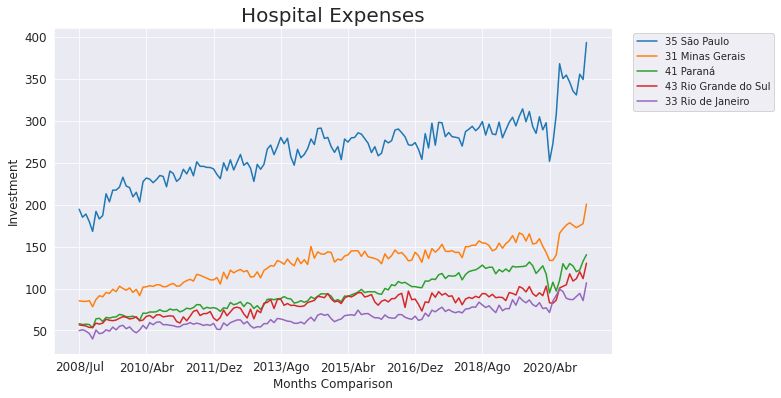

In [12]:
#setconfig
highest = highest_values / 1000000
highest.head(5).T.plot(figsize=(10,6), kind='line').legend(bbox_to_anchor=(1.3, 1))

# background style
sns.set_style('darkgrid')

# chart settings
plt.title('Hospital Expenses', fontsize=20)
plt.xlabel('Months Comparison', fontsize=12)
plt.ylabel('Investment', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# exhibition
plt.show()

To have a dimension of the difference in expenses it will be analyzed the first in relation to fifth place

In [13]:
last_month = highest_values.columns[-1]
last_month_report = highest_values[last_month]
last_month_report.head(5)

Unidade da Federação
35 São Paulo           392946147.42
31 Minas Gerais        200471045.07
41 Paraná              140264608.52
43 Rio Grande do Sul   130155185.16
33 Rio de Janeiro      106837295.81
Name: 2021/Mar, dtype: float64

The most recent spending

In [14]:
last_month_report / last_month_report.loc['33 Rio de Janeiro']

Unidade da Federação
35 São Paulo             3.68
31 Minas Gerais          1.88
41 Paraná                1.31
43 Rio Grande do Sul     1.22
33 Rio de Janeiro        1.00
29 Bahia                 0.92
26 Pernambuco            0.79
42 Santa Catarina        0.76
23 Ceará                 0.58
52 Goiás                 0.43
15 Pará                  0.31
21 Maranhão              0.37
32 Espírito Santo        0.43
24 Rio Grande do Norte   0.22
25 Paraíba               0.24
53 Distrito Federal      0.30
50 Mato Grosso do Sul    0.24
22 Piauí                 0.19
27 Alagoas               0.21
51 Mato Grosso           0.18
13 Amazonas              0.21
28 Sergipe               0.12
17 Tocantins             0.01
11 Rondônia              0.10
12 Acre                  0.04
14 Roraima               0.04
16 Amapá                 0.03
Name: 2021/Mar, dtype: float64

In relation to Rio de Janeiro the state of Sao Paulo spent almost 4 times more

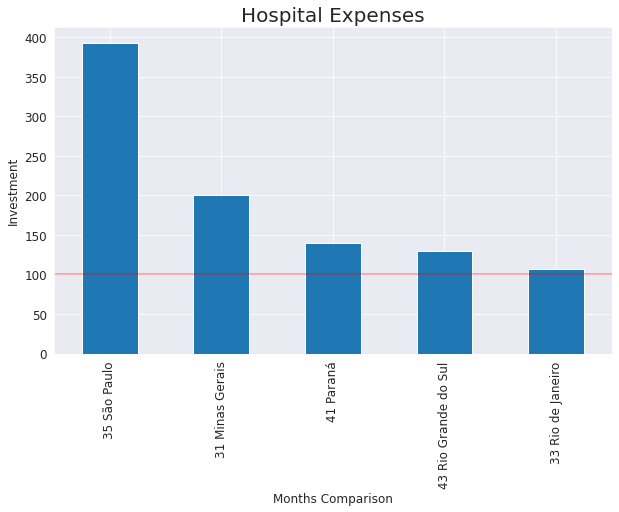

In [15]:
lm =  last_month_report.sort_values(ascending=False)
lm = lm / 1000000
lm.head(5).plot(figsize=(10,6), kind='bar')

# background style
sns.set_style('darkgrid')

# chart settings
plt.title('Hospital Expenses', fontsize=20)
plt.xlabel('Months Comparison', fontsize=12)
plt.ylabel('Investment', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axhspan(100, 102, color='r', alpha=0.2)

# exhibition
plt.show()



To understand this phenomenon, the estimated population of the states will be analyzed.

In [16]:
select_pop = pop.loc[[22,19,24,26,21]]
select_pop.reset_index(drop=True, inplace=True)
select_pop.columns = ['Estados', 'População Estimativa']
select_pop

,Estados,População Estimativa
0,São Paulo,46289333
1,Minas Gerais,21292666
2,Paraná,11516840
3,Rio Grande do Sul,11422973
4,Rio de Janeiro,17366189


In this way analyzing will be seen the estimated expenditure per inhabitant

In [17]:
pop_uf = pop.loc[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,24,25,26,28,29,30,31]]
pop_uf.reset_index(drop=True, inplace=True)
pop_uf.columns = ['Unidade da Federação', 'População Estimada']
pop_uf.head()

,Unidade da Federação,População Estimada
0,Rondônia,1796460
1,Acre,894470
2,Amazonas,4207714
3,Roraima,631181
4,Pará,8690745


In [18]:
uf_names = {}
for i in last_month_report.index:
  uf_names.update({' '.join(i.split()[1:]) : i})

In [19]:
pop_uf['Unidade da Federação'].replace(uf_names, inplace=True)
pop_uf.head()
spending_pop = pd.merge(last_month_report, pop_uf, on='Unidade da Federação')
spending_pop.set_index('Unidade da Federação', inplace=True)

In [20]:
spending_pop.head()

,2021/Mar,População Estimada
Unidade da Federação,,
35 São Paulo,392946147.42,46289333
31 Minas Gerais,200471045.07,21292666
41 Paraná,140264608.52,11516840
43 Rio Grande do Sul,130155185.16,11422973
33 Rio de Janeiro,106837295.81,17366189


In [21]:
spending_pop['Gasto/Habitante'] = spending_pop['2021/Mar']/spending_pop['População Estimada']
spending_pop.head()

,2021/Mar,População Estimada,Gasto/Habitante
Unidade da Federação,,,
35 São Paulo,392946147.42,46289333,8.49
31 Minas Gerais,200471045.07,21292666,9.42
41 Paraná,140264608.52,11516840,12.18
43 Rio Grande do Sul,130155185.16,11422973,11.39
33 Rio de Janeiro,106837295.81,17366189,6.15


In [22]:
spending_pop.mean()

2021/Mar             62502301.42
População Estimada    7842803.41
Gasto/Habitante             7.08
dtype: float64

Average expenditure per inhabitant in the last month is 7.08 R$

# Analysis by region

In [23]:
region = {'11 Rondônia' : 'Norte','12 Acre' : 'Norte','13 Amazonas' : 'Norte','14 Roraima' : 'Norte',
           '15 Pará' : 'Norte','16 Amapá' : 'Norte','17 Tocantins' : 'Norte',
           '21 Maranhão' : 'Nordeste','22 Piauí' : 'Nordeste','23 Ceará' : 'Nordeste',
           '24 Rio Grande do Norte' : 'Nordeste','25 Paraíba' : 'Nordeste','26 Pernambuco' : 'Nordeste',
           '27 Alagoas' : 'Nordeste','28 Sergipe' : 'Nordeste','29 Bahia' : 'Nordeste',
           '31 Minas Gerais' : 'Sudeste','32 Espírito Santo' : 'Sudeste','33 Rio de Janeiro' : 'Sudeste',
           '35 São Paulo' : 'Sudeste',
           '41 Paraná' : 'Sul','42 Santa Catarina' : 'Sul','43 Rio Grande do Sul' : 'Sul',
           '50 Mato Grosso do Sul' : 'Centroeste','51 Mato Grosso' : 'Centroeste','52 Goiás' : 'Centroeste',
           '53 Distrito Federal' : 'Centroeste'}

In [26]:
organized_population_spending = spending_pop['Gasto/Habitante'].sort_values(ascending = False)
all_region = []
for i in organized_population_spending.index:
  all_region.append(region[i])

all_region

['Sul',
 'Sul',
 'Sul',
 'Sudeste',
 'Centroeste',
 'Sudeste',
 'Centroeste',
 'Nordeste',
 'Sudeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Centroeste',
 'Nordeste',
 'Norte',
 'Sudeste',
 'Norte',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Centroeste',
 'Norte',
 'Norte',
 'Norte',
 'Norte',
 'Norte']

In [28]:
regional_spending = pd.DataFrame(organized_population_spending)
regional_spending['Região'] = all_region
regional_spending

,Gasto/Habitante,Região
Unidade da Federação,,
41 Paraná,12.18,Sul
43 Rio Grande do Sul,11.39,Sul
42 Santa Catarina,11.22,Sul
32 Espírito Santo,11.19,Sudeste
53 Distrito Federal,10.42,Centroeste
31 Minas Gerais,9.42,Sudeste
50 Mato Grosso do Sul,8.96,Centroeste
26 Pernambuco,8.72,Nordeste
35 São Paulo,8.49,Sudeste


To better observe this case, a graphical analysis will be done

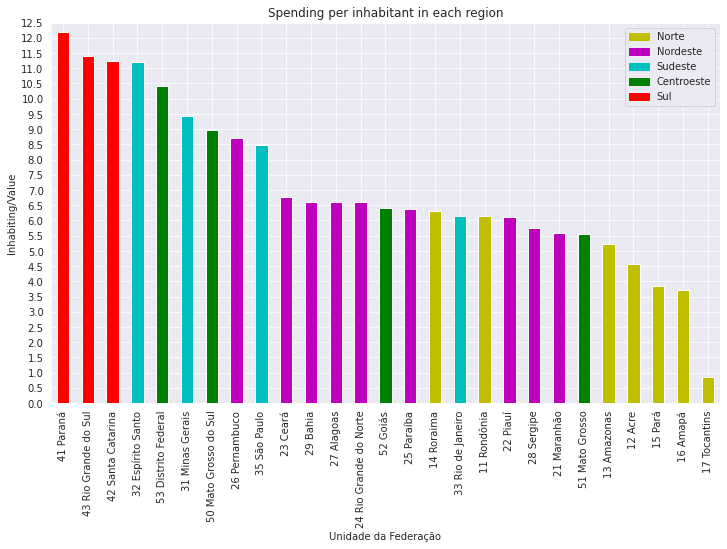

In [39]:
colors = {'Norte': 'y', 'Nordeste': 'm', 'Sudeste': 'c', 'Centroeste': 'g', 'Sul': 'r' }

ax = regional_spending.plot(
                            kind='bar',
                            zorder=2,
                            figsize=(12,7),
                            color=[[colors[i] for i in regional_spending['Região']]],
                            
                            )

plt.ylim(0,8)
plt.grid(b=True, which='major', axis='y', zorder=1)

NT = map.Patch(color='y', label='Norte')
ND = map.Patch(color='m', label='Nordeste')
SD = map.Patch(color='c', label='Sudeste')
CO = map.Patch(color='g', label='Centroeste')
SU = map.Patch(color='r', label='Sul')
plt.legend(handles=[NT,ND,SD,CO,SU], loc=1)

plt.yticks(np.arange(0, 13, step=0.5))
plt.ylabel('Inhabiting/Value')
plt.title('Spending per inhabitant in each region')
plt.show()

It is notable that in the South in the last month it was higher than in the other states

In [45]:
south =regional_spending.loc[['41 Paraná', '43 Rio Grande do Sul', '42 Santa Catarina']]
south.mean()

Gasto/Habitante   11.60
dtype: float64

The average investment per inhabitant in the south is very high 11.60 R$

In [79]:
largest_regional = regional_spending.loc[['41 Paraná','32 Espírito Santo','53 Distrito Federal','26 Pernambuco','14 Roraima']]

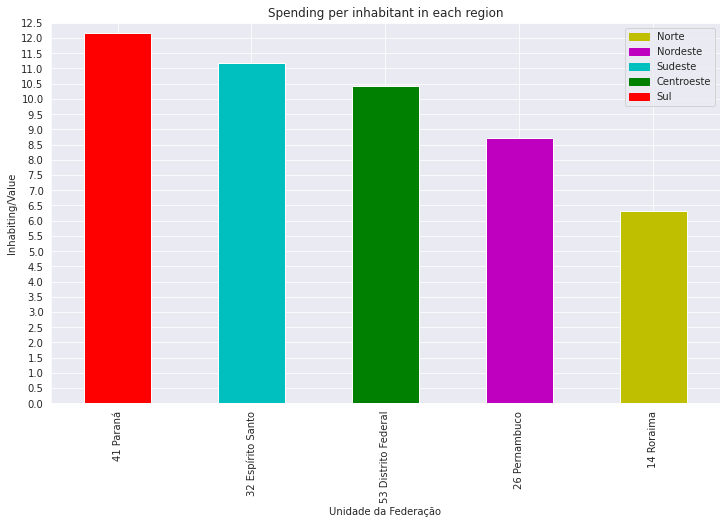

In [74]:
colors = {'Norte': 'y', 'Nordeste': 'm', 'Sudeste': 'c', 'Centroeste': 'g', 'Sul': 'r' }

ax = largest_regional.plot(
                            kind='bar',
                            zorder=2,
                            figsize=(12,7),
                            color=[[colors[i] for i in largest_regional['Região']]],
                            
                            )

plt.ylim(0,8)
plt.grid(b=True, which='major', axis='y', zorder=1)

NT = map.Patch(color='y', label='Norte')
ND = map.Patch(color='m', label='Nordeste')
SD = map.Patch(color='c', label='Sudeste')
CO = map.Patch(color='g', label='Centroeste')
SU = map.Patch(color='r', label='Sul')
plt.legend(handles=[NT,ND,SD,CO,SU], loc=1)

plt.yticks(np.arange(0, 13, step=0.5))
plt.ylabel('Inhabiting/Value')
plt.title('Spending per inhabitant in each region')
plt.show()

In comparison to the states in each region with the highest investment per inhabitant

# Conclusion

Health is a fundamental item and many people do not understand why governments often leave investments in this area in the background, generating greater demands that could certainly be avoided. To understand Brazil in this context, it is necessary to compare other nations. The world average is an investment of 6.08% of GDP in health. In Canada, for example, this percentage reaches 7.66%; in France it is 9.04%; Spain with 7.08% and Switzerland with 6.97% are other highlights. In Brazil, this number is only 4.32%.
Also according to data from WHO (World Health Organization), the amount invested by Brazilians is paid by the users themselves, we are talking about private health plans. If this percentage depended only on government investments, unfortunately, we would have even worse figures.
In the case of Brazil, the population pays 47.5% of the bill and the government 52.5%. In the world average, the opposite occurs in investments: governments pay 57.6% of expenses, while the population contributes with another 42.3%. This indication is symptomatic that there should be more investments in health here. In this brief analysis we can see that the investment ends up being very little and creates a lot of problems. A nation like Brazil is experiencing a problem of poor management. It is worth noting that the money ends up being misused and states practice without a decent investment.